In [46]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

load csvs

In [2]:
df = pd.read_csv('tripdata_01.csv')
print(f"data rows={df.shape[0]}")

data rows=13665596


In [3]:
clustercsv = pd.read_csv('Clustering/both_kmeansraw25.csv')
print(f"csv rows={clustercsv.shape[0]}")
N_clusters = max(clustercsv["pickup_cluster"])+1

csv rows=13665596


Prints plots with each one cluster in read (to identify the position of the clusters

In [49]:
fitedPoints = clustercsv["pickup_cluster"]

for i in range(0,N_clusters):
    fitedColors = [0xff0000 if a == i else 0x0000ff for a in fitedPoints]

    plt.scatter(df["pickup_longitude"], df["pickup_latitude"], c=fitedColors, s=0.001)
    plt.title(f"Cluster{i}")
    plt.savefig(f"Output/ClusterDefinition/Cluster{i}.png")
    plt.show()


KeyboardInterrupt



The next step was to divide the city in 3 circles (outer middle and inner circle)
0... inner, 1... middle, 2...outer

In [51]:
clusterToCircleDict = {0:1, 1:0, 2:2, 3:1, 4:0, 5:2, 6:1, 7:0, 8:1, 9:2,
                       10:1, 11:0, 12:2, 13:1, 14:1, 15:2, 16:1, 17:2, 18:2, 19:2,
                       20:1, 21:1, 22:0, 23:0, 24:1}

clustercsv["pickup_circle"] = clustercsv["pickup_cluster"].apply(lambda x: clusterToCircleDict.get(x))
clustercsv["dropoff_circle"] = clustercsv["dropoff_cluster"].apply(lambda x: clusterToCircleDict.get(x))


In [ ]:
colors = {0:'red', 1:'green', 2:'blue'}

fittedColors = clustercsv["pickup_circle"].apply(lambda x: colors.get(x))

plt.scatter(df["pickup_longitude"], df["pickup_latitude"], c=fittedColors, s=0.0005)
plt.title(f"Circle")
plt.savefig(f"Output/ClusterDefinition/Circle.png")
plt.show()

Show how many routes are from cluster to cluster:

In [12]:
clustercsv["cluster_movement"] = clustercsv["pickup_cluster"]*10000+clustercsv["dropoff_cluster"]
clustercsv["cluster_movement"].value_counts()

40004     196783
10022     193448
240013    193432
220001    190707
130024    190273
           ...  
120020         4
170012         4
190012         3
120002         2
120019         1
Name: cluster_movement, Length: 624, dtype: int64

In [13]:
clustercsv["pickup_cluster"].value_counts()

1     1385559
13    1331750
24    1228982
7     1203760
11    1187226
22    1028342
4      933145
16     928597
3      902277
23     899604
10     750836
0      509934
8      470462
9      225338
5      145623
21     141245
6      135150
14     119312
20      65902
2       28165
15      17746
18      12590
19       5731
17       5444
12       2876
Name: pickup_cluster, dtype: int64

In [14]:
clustercsv["dropoff_cluster"].value_counts()

1     1299450
13    1216462
7     1188996
24    1171708
11    1061536
22     994593
4      970706
16     810418
3      804794
23     795793
10     736638
0      555000
8      506142
6      280939
21     274765
20     209732
14     209106
9      172207
15     100187
5       83233
18      74373
2       66200
17      36785
19      28640
12      17193
Name: dropoff_cluster, dtype: int64

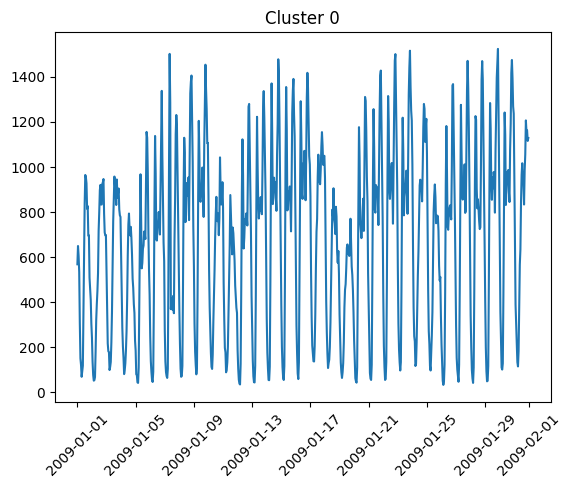

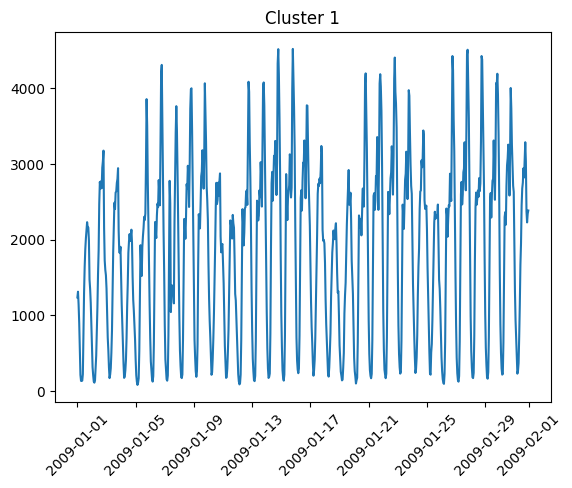

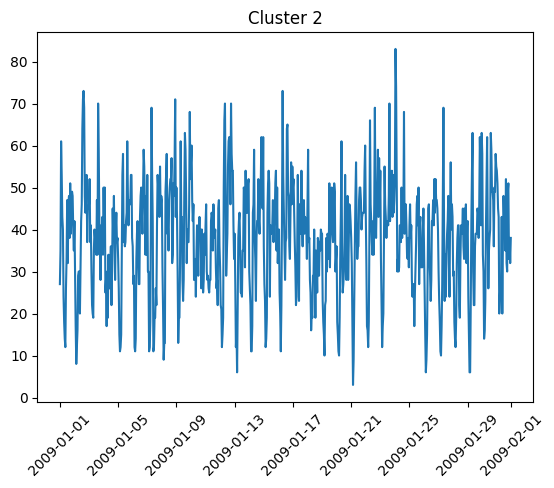

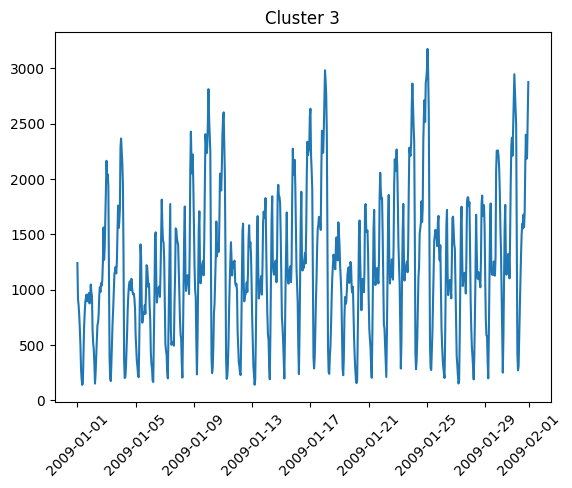

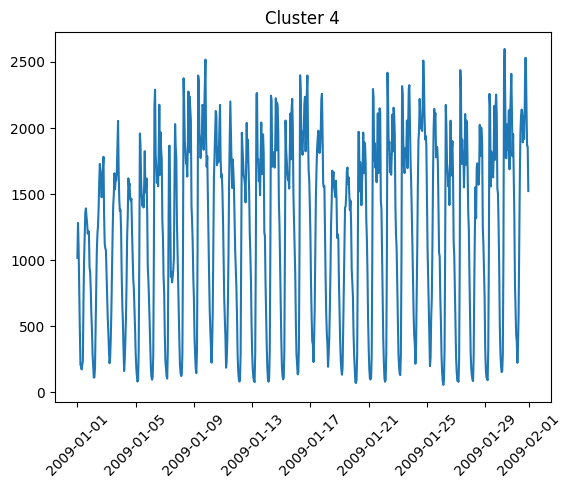

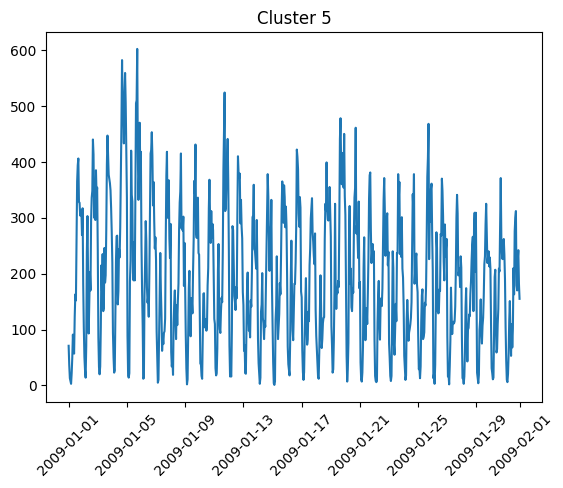

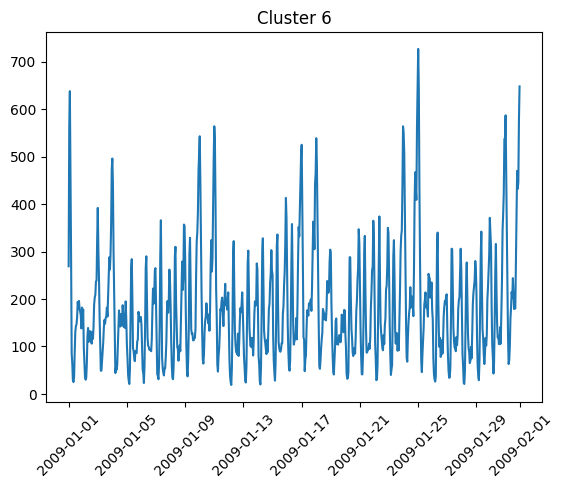

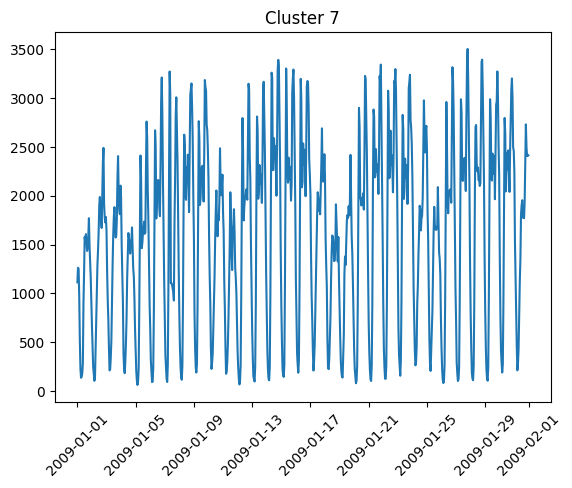

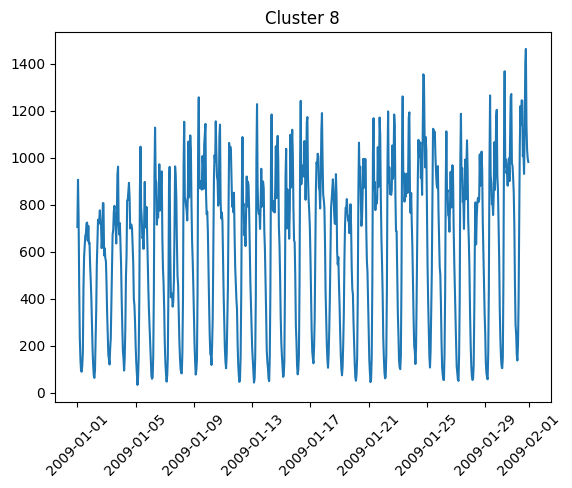

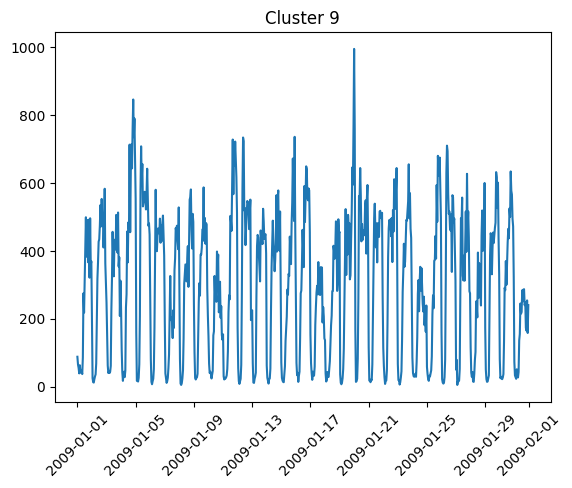

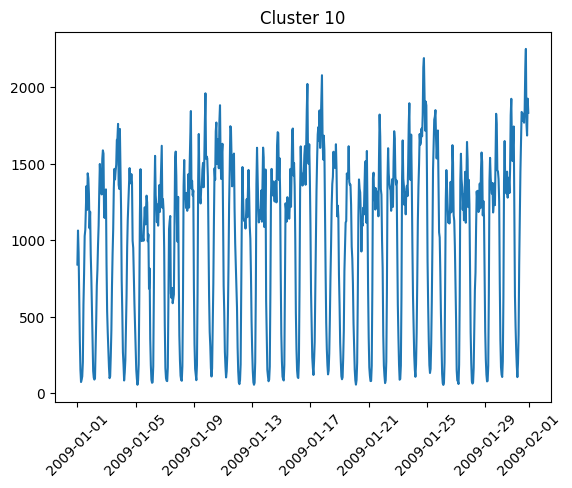

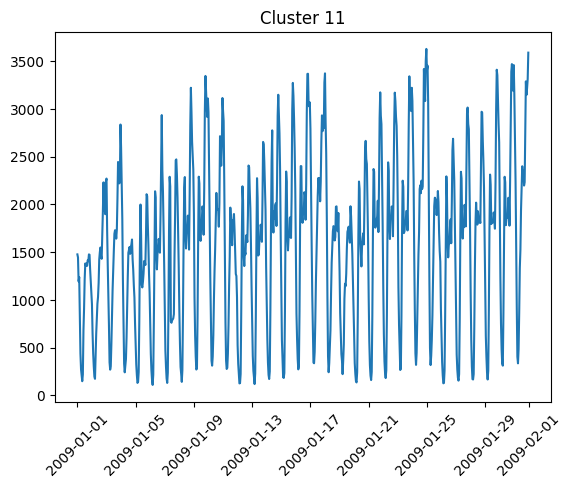

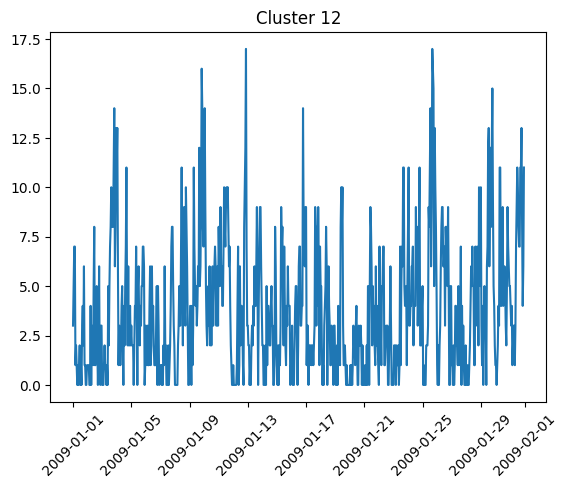

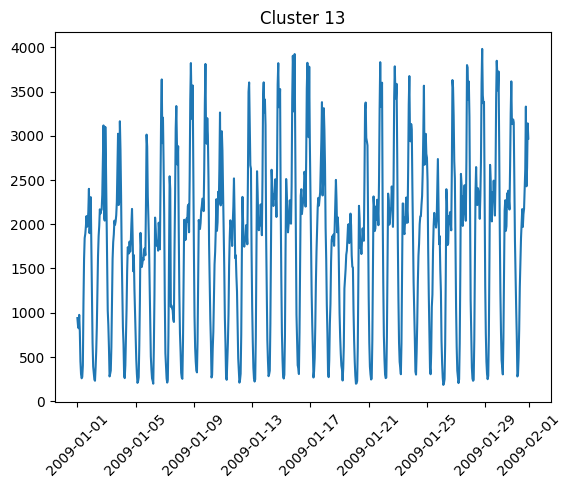

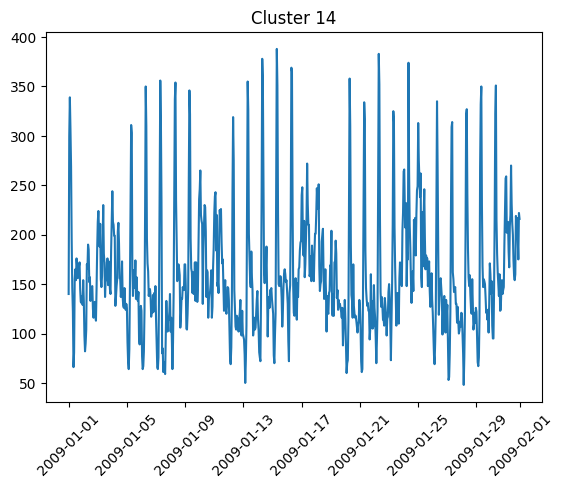

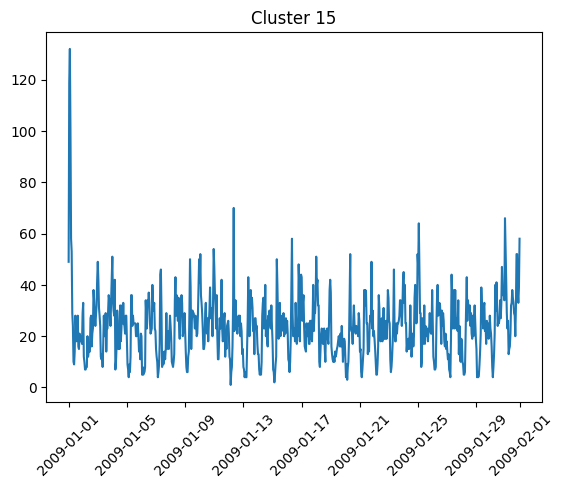

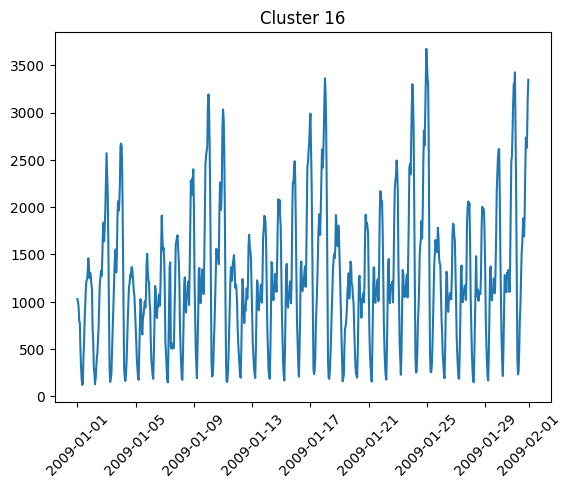

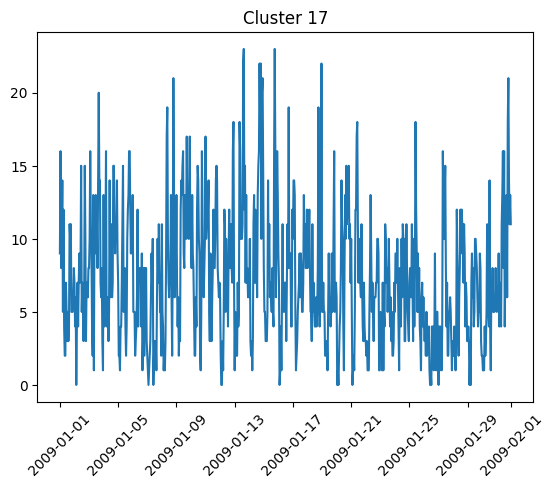

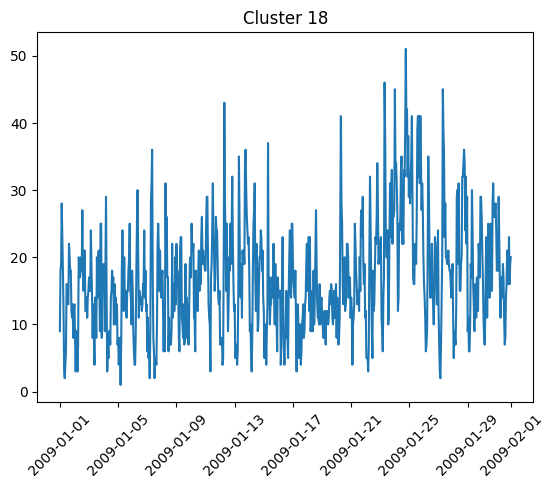

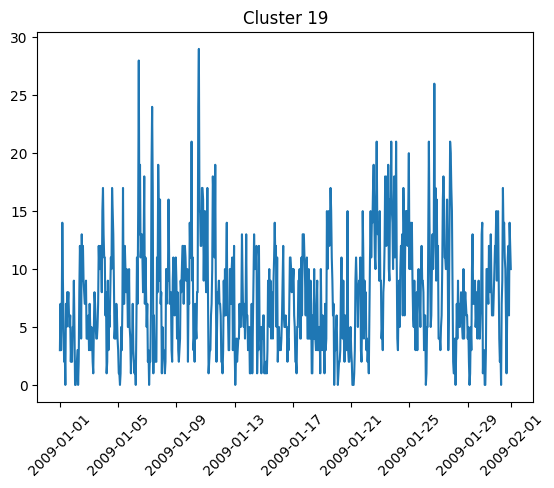

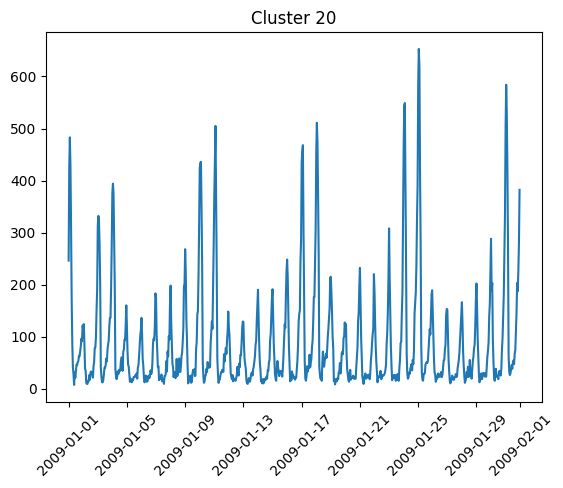

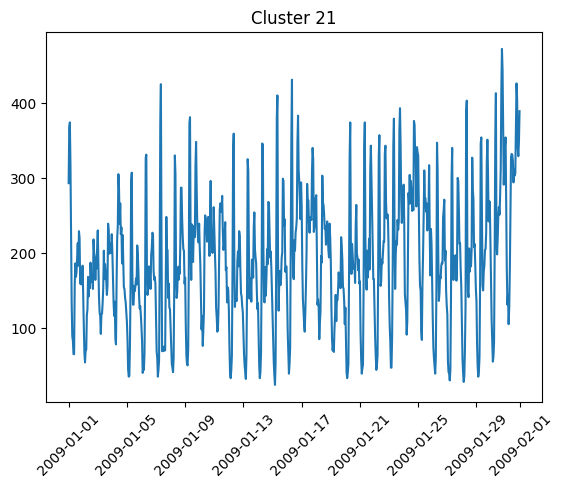

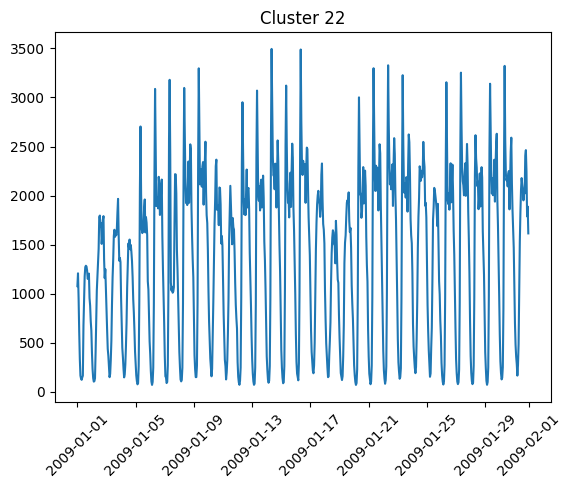

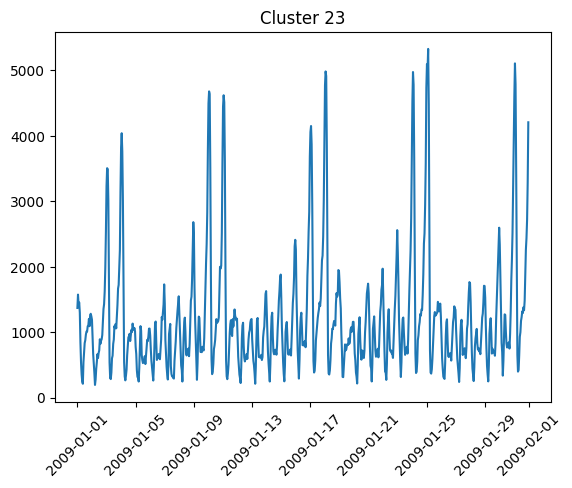

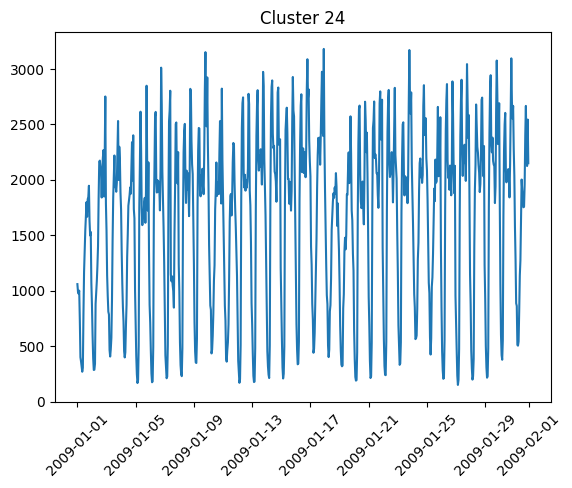

In [47]:

clustercsv["time"] = pd.to_datetime(clustercsv["time"])
clusterTimeframe = clustercsv[["time","pickup_cluster"]]
for i in range(0, N_clusters):

    results = clusterTimeframe[clusterTimeframe["pickup_cluster"]==i].resample("H", on='time').count()
    plt.plot(results.index,results.pickup_cluster)
    plt.xticks(rotation = 45)
    plt.title(f"Cluster {i}")
    plt.savefig(f"Output/ClusterMonthPickup/cluster{i}.png")
    plt.show()

Plot clusters per week!

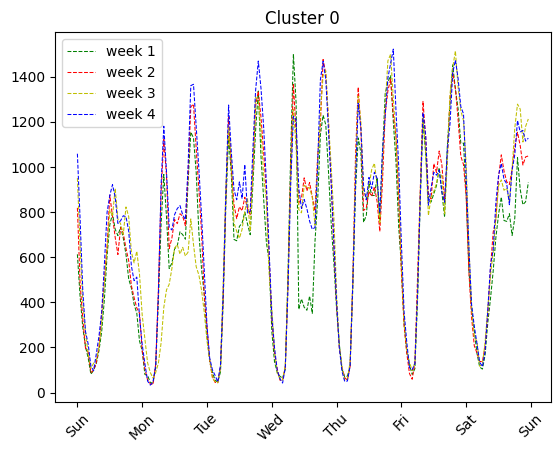

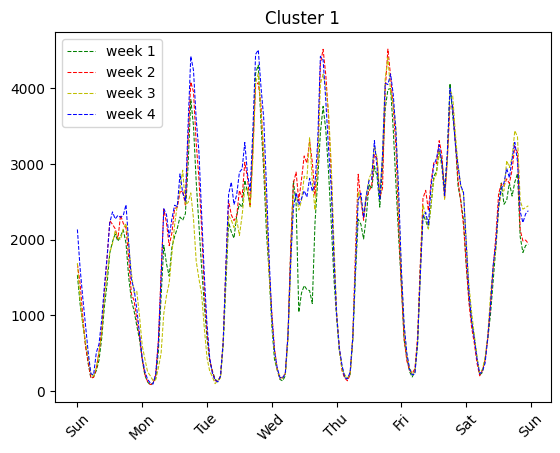

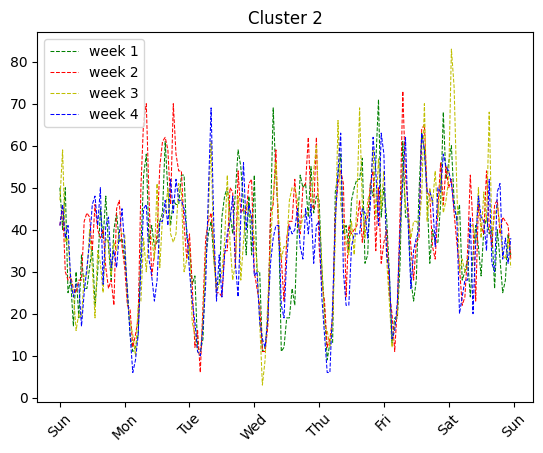

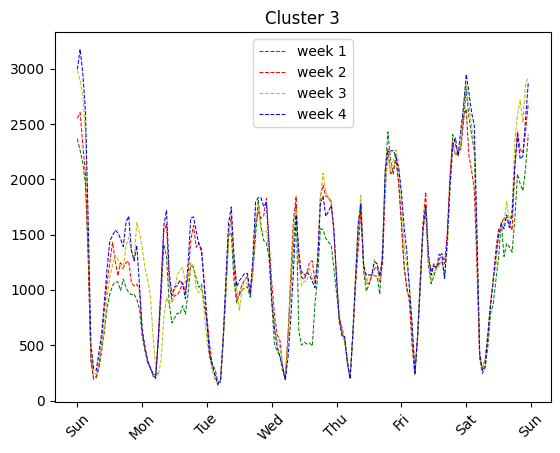

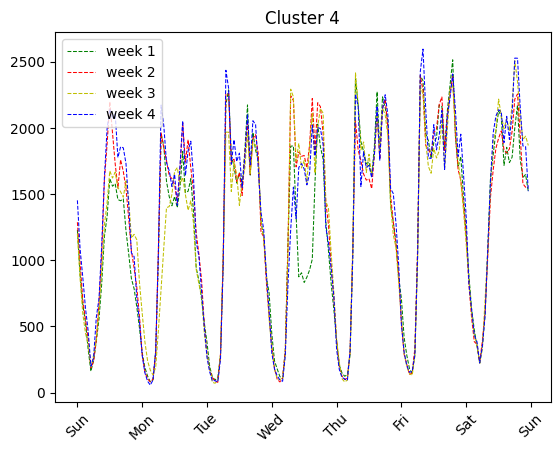

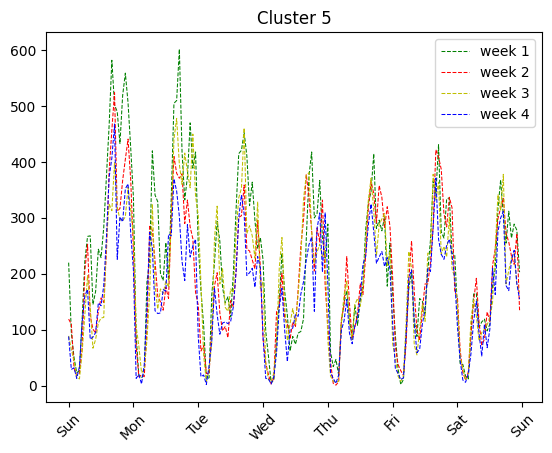

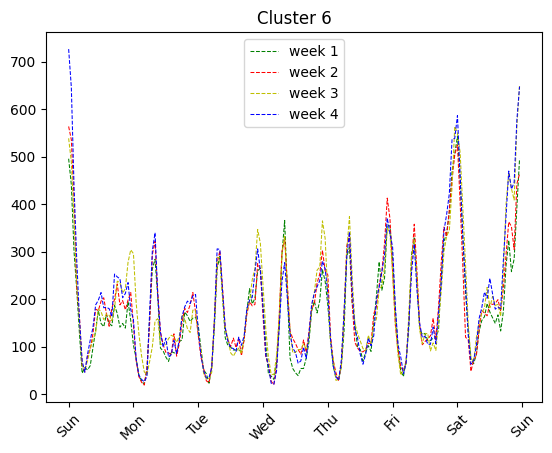

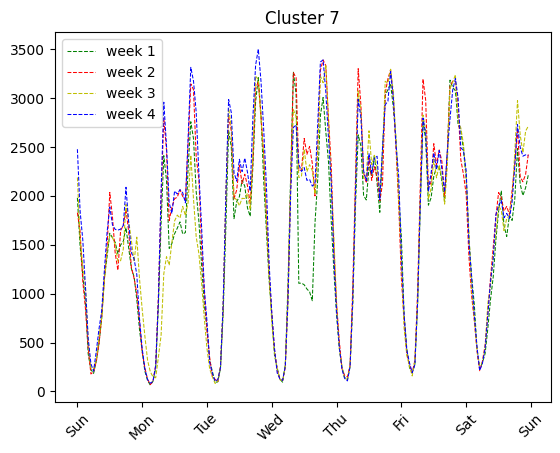

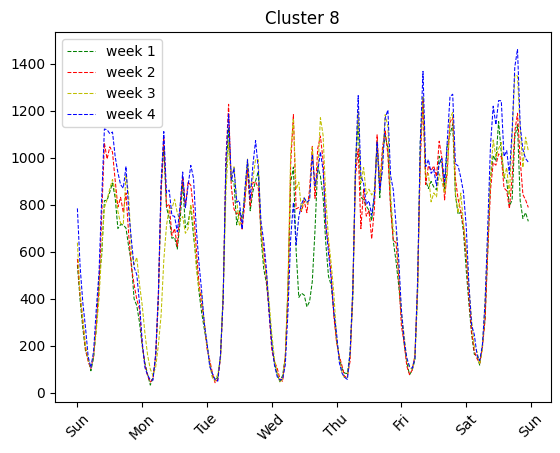

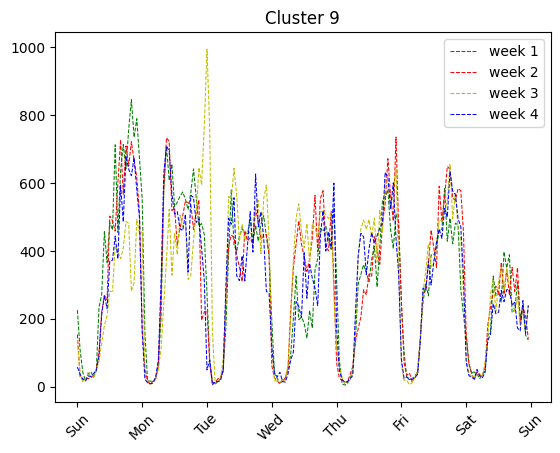

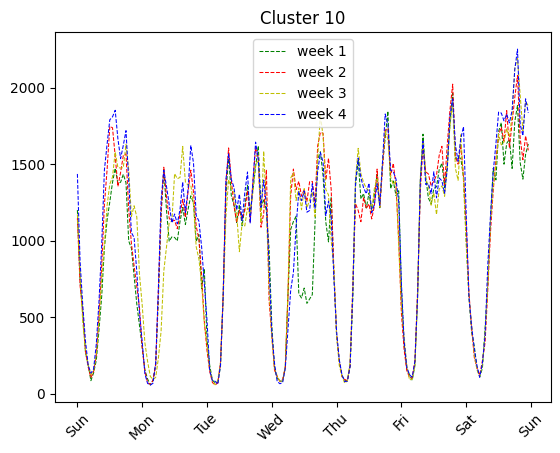

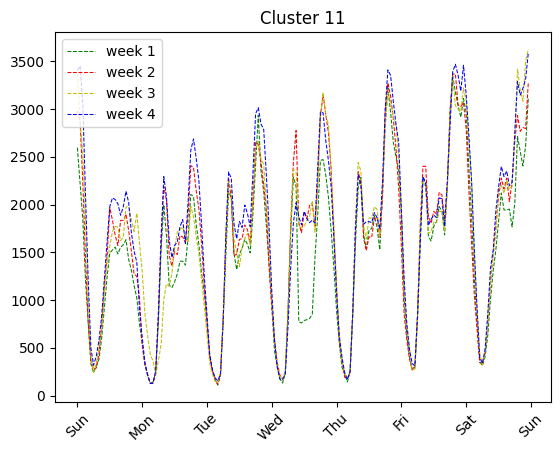

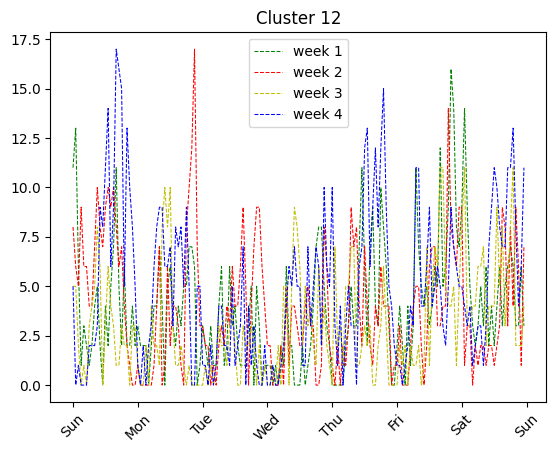

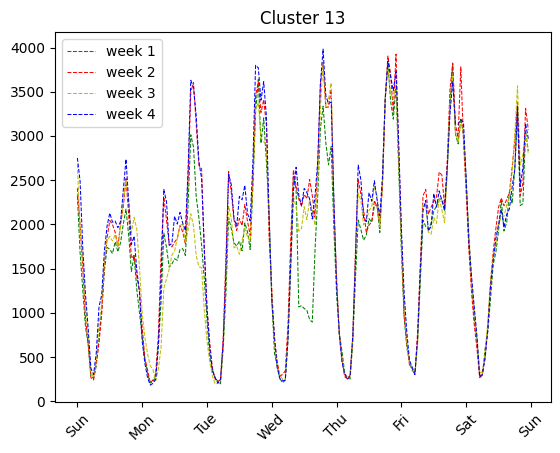

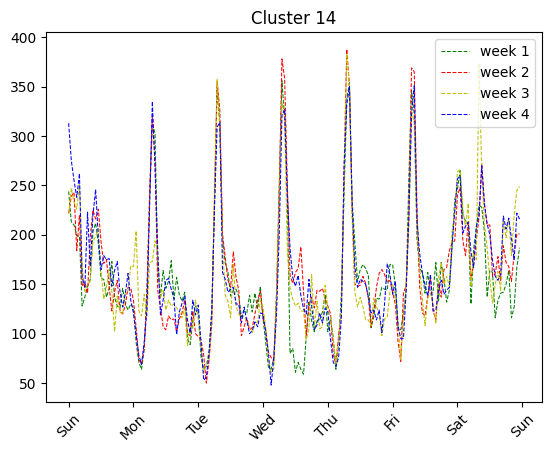

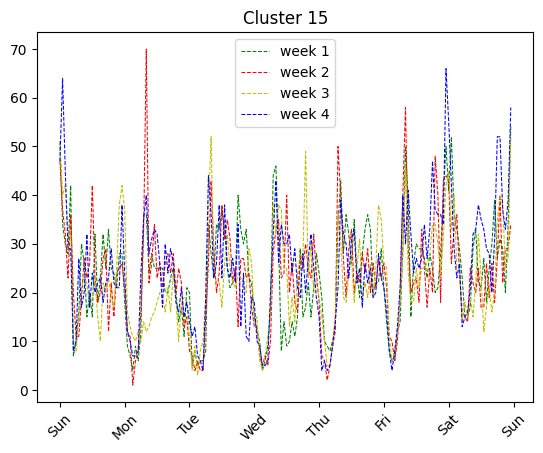

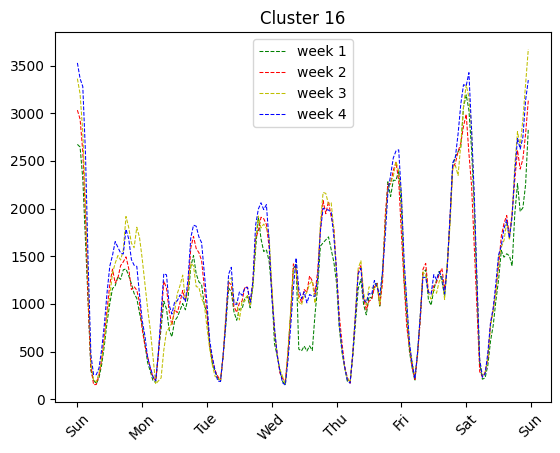

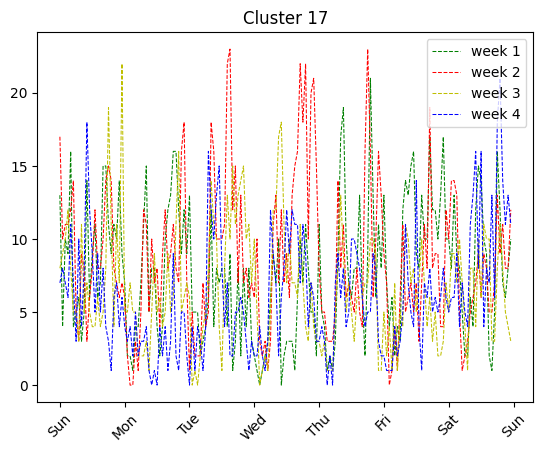

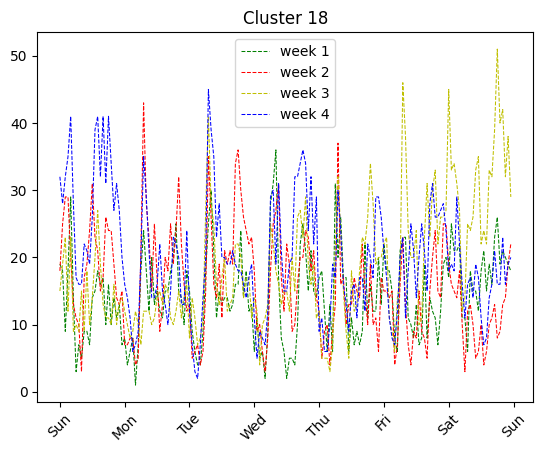

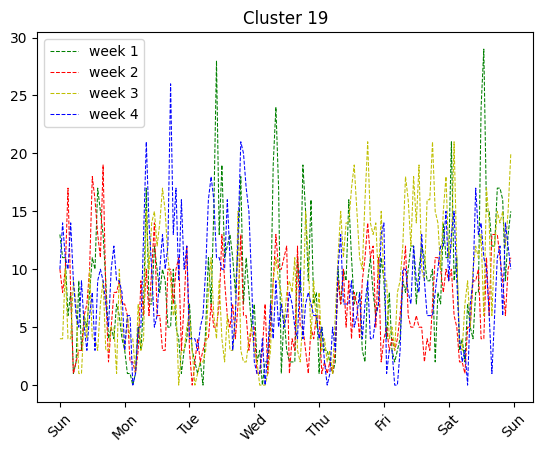

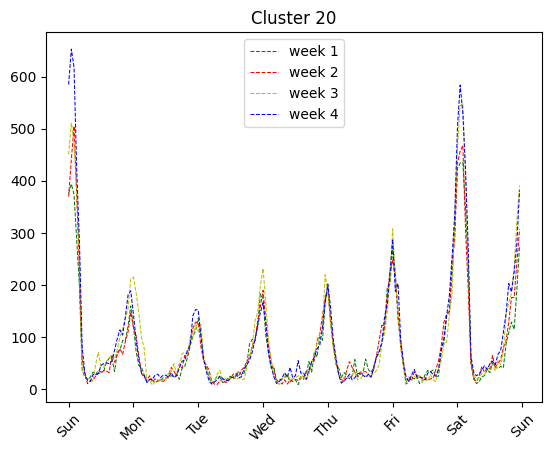

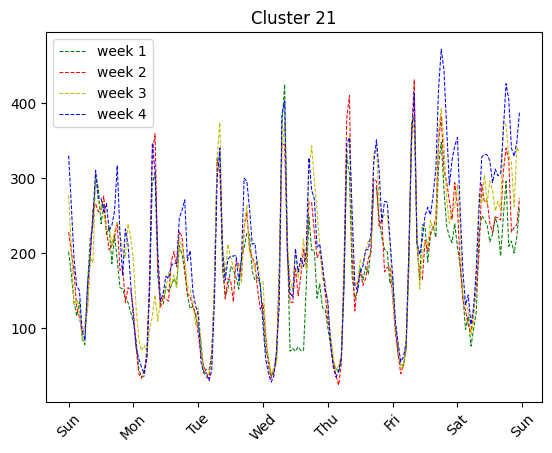

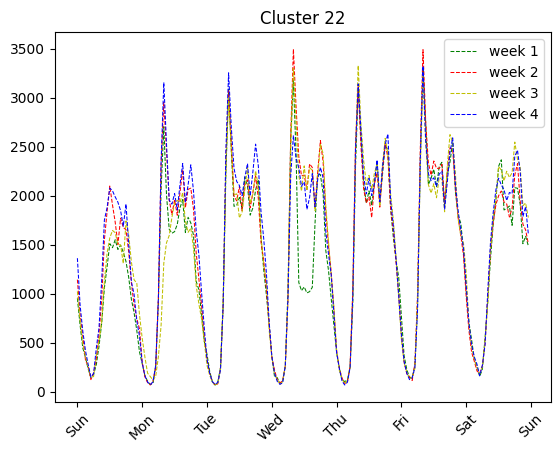

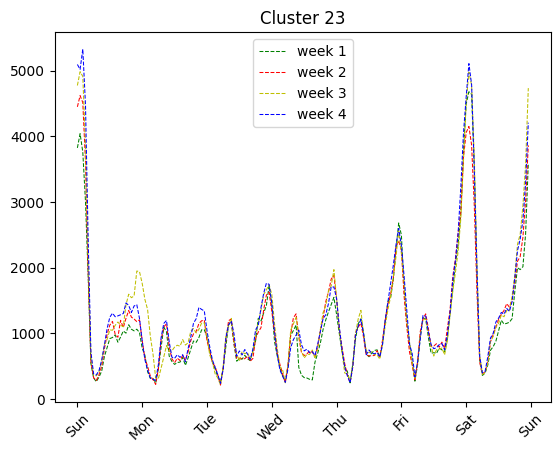

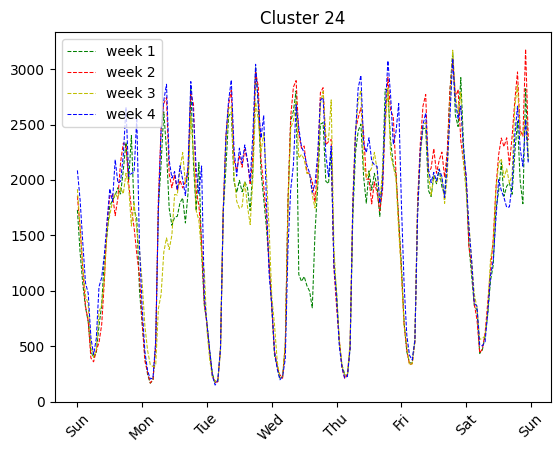

In [48]:
clustercsv["dropoff_cluster"].value_counts()
clustercsv["time"] = pd.to_datetime(clustercsv["time"])
clusterTimeframe = clustercsv[["time", "pickup_cluster"]]
weeklyFilter = [('2009-01-04','2009-01-10',"g--","week 1",0),
                ('2009-01-11','2009-01-17',"r--","week 2",7),
                ('2009-01-18','2009-01-24',"y--","week 3",14),
                ('2009-01-25','2009-01-31',"b--","week 4",21)]

for i in range(0, N_clusters):
    fig, ax = plt.subplots()
    results = clusterTimeframe[clusterTimeframe["pickup_cluster"]==i].resample("H", on='time').count()

    for filterstart, filterend, color, week, dayreduction in weeklyFilter:
        datasetnew = results.loc[filterstart:filterend]
        plt.plot(datasetnew.index - pd.Timedelta(dayreduction,unit='D'),datasetnew.pickup_cluster,color,label=week, linewidth=0.75)
    plt.xticks(rotation=45)
    plt.title(f"Cluster {i}")
    plt.savefig(f"Output/ClusterWeekPickup/cluster{i}.png")
    ax.xaxis.set_major_formatter(DateFormatter("%a"))
    plt.legend()

    plt.show()

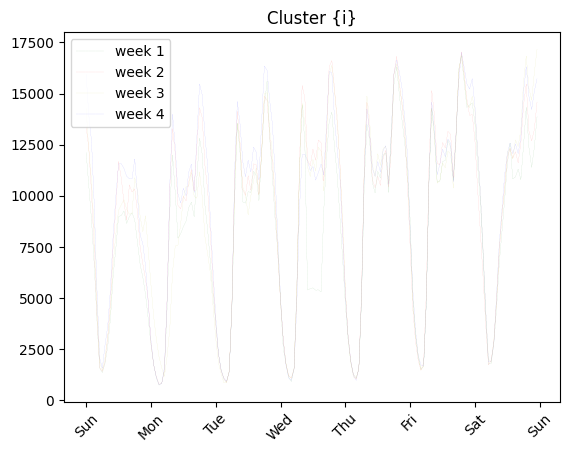

In [56]:
clustercsv["time"] = df["pickup_time"]
clustercsv["time"] = pd.to_datetime(clustercsv["time"])
clusterTimeframe = clustercsv[["time","pickup_circle"]]
results = clusterTimeframe[clusterTimeframe["pickup_circle"]==0].resample("H", on='time').count()
weeklyFilter = [('2009-01-04','2009-01-10',"g--","week 1",0),
                ('2009-01-11','2009-01-17',"r--","week 2",7),
                ('2009-01-18','2009-01-24',"y--","week 3",14),
                ('2009-01-25','2009-01-31',"b--","week 4",21)]

fig, ax = plt.subplots()
for filterstart, filterend, color, week, dayreduction in weeklyFilter:
    datasetnew = results.loc[filterstart:filterend]
    plt.plot(datasetnew.index - pd.Timedelta(dayreduction,unit='D'),datasetnew.pickup_circle,color,label=week, linewidth=0.5)
plt.xticks(rotation = 45)
plt.title("Cluster {i}")
ax.xaxis.set_major_formatter(DateFormatter("%a"))
plt.legend()
plt.show()

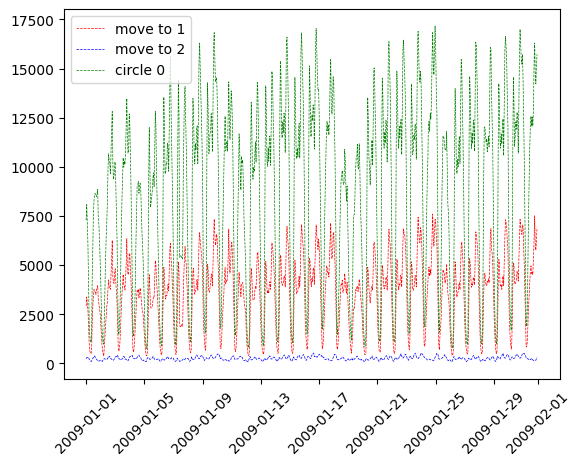

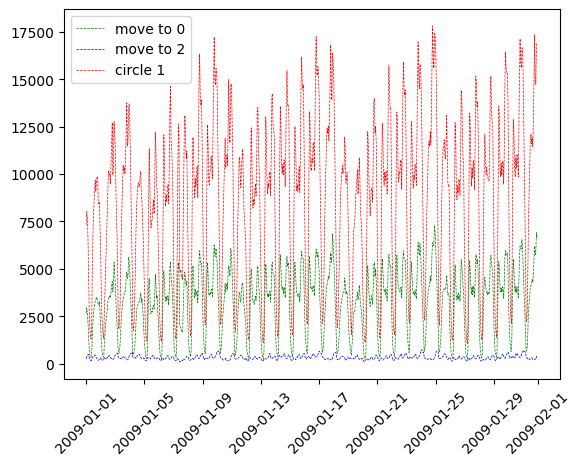

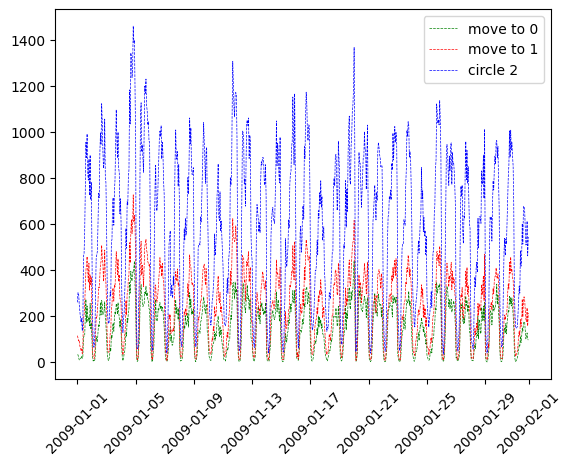

In [72]:
clustercsv["time"] = df["pickup_time"]
clustercsv["time"] = pd.to_datetime(clustercsv["time"])
clustercsv["movement_circle"] = clustercsv["pickup_circle"]*100+clustercsv["dropoff_circle"]

clusterTimeframe = clustercsv[["time","pickup_circle","movement_circle"]]
weeklyFilter = [('2009-01-04','2009-01-10',"g--","week 1",0),
                ('2009-01-11','2009-01-17',"r--","week 2",7),
                ('2009-01-18','2009-01-24',"y--","week 3",14),
                ('2009-01-25','2009-01-31',"b--","week 4",21)]

circleColors = ["g--","r--","b--"]

for i in range(0,3):
    for j in range(0,3):
        if i == j: continue
        results = clusterTimeframe[clusterTimeframe["movement_circle"]==i*100+j].resample("H", on='time').count()
        plt.plot(results.index,results.movement_circle, circleColors[j], label=f"move to {j}", linewidth=0.5)
    results = clusterTimeframe[clusterTimeframe["pickup_circle"]==i].resample("H", on='time').count()
    plt.plot(results.index,results.pickup_circle, circleColors[i], label=f"circle {i}", linewidth=0.5)
    plt.xticks(rotation = 45)
    plt.legend()
    plt.show()